# Principle Component Analysis
This Matlab code has been completed as part of [Machine Learning](https://www.coursera.org/learn/machine-learning)
course in Coursera given by Prof. Andrew Ng

------------
This note demonstrates the use of principal component analysis (PCA) to find a low-dimensional representation of the data. The example taken in this note is face images.

This notebook includes:

- <a href='#part1'>Part 1: Principal Component Analysis</a>
- <a href='#part2'>Part 2: PCA on Face Data</a>

This code requires the following functions
* <a href='https://github.com/linhvannguyen/MachineLearning_AndrewNG/blob/master/matlab/funcs/funcs_09_KmeanPCA_drawLine.m'>funcs_09_KmeanPCA_drawLine.m</a> 
* <a href='https://github.com/linhvannguyen/MachineLearning_AndrewNG/blob/master/matlab/funcs/funcs_09_KmeanPCA_displayData.m'>funcs_09_KmeanPCA_displayData.m</a>

In [1]:
clear all; close all; clc; warning off;
addpath('../data/') % add path to directory containing data files
addpath('./funcs/') % add path to directory containing subfunction files

## Part 1: Principal Component Analysis <a id='part1'></a>

We will first start with a 2D dataset which has one direction of large variation and one of smaller variation. We will visualize what happens when you use PCA to reduce the data from 2D to 1D.

#### Implementation

The implementation of PCA consists of two computational steps: 

* Step 1: compute the covariance matrix of the data: $\displaystyle \Sigma = \frac{1}{m}X^TX$
* Step 2: Singular Value Decomposition (SVD) to compute the eigenvectors $U_1 , U_2 , . . . , U_n$ . These will correspond to the principal components of variation in the data. It is done in Octave/MATLAB by using the command: $[U, S, V] = svd(\Sigma)$, where U will contain the principal components and S will contain a diagonal matrix.

Before using PCA, it is important to first normalize the data by subtracting the mean value of each feature from the dataset, and scaling each dimension so that they are in the same range. 


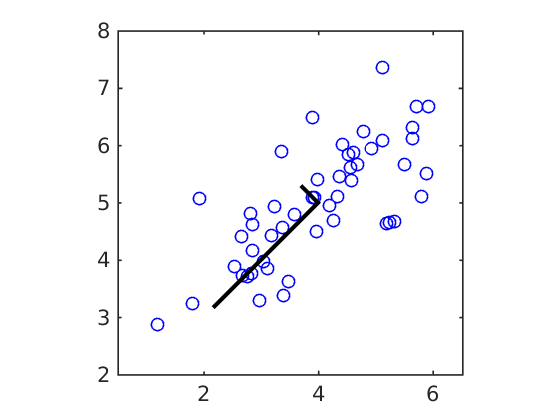

Top eigenvector: 
 U(:,1) = -0.707107 -0.707107

In [2]:
load ('data_09_PCA_data1');

%  Before running PCA, it is important to first normalize X
mu = mean(X);
X_norm = bsxfun(@minus, X, mu);
sigma = std(X_norm);
X_norm = bsxfun(@rdivide, X_norm, sigma);

%  Perform PCA
Sigma=1/size(X_norm,1)*(X_norm')*X_norm;
[U, S, V] = svd(Sigma);

%  Draw the eigenvectors centered at mean of data. These lines show the directions of maximum variations in the dataset.
plot(X(:, 1), X(:, 2), 'bo');
axis([0.5 6.5 2 8]); axis square;
hold on;
funcs_09_KmeanPCA_drawLine(mu, mu + 1.5 * S(1,1) * U(:,1)', '-k', 'LineWidth', 2);
funcs_09_KmeanPCA_drawLine(mu, mu + 1.5 * S(2,2) * U(:,2)', '-k', 'LineWidth', 2);
hold off;

fprintf('Top eigenvector: \n');
fprintf(' U(:,1) = %f %f \n', U(1,1), U(2,1));

#### Dimension Reduction
After computing the principal components, you can use them to reduce the feature dimension of your dataset by projecting each example onto a lower dimensional space, $x^{(i)} → z^{(i)}$ (e.g., projecting the data from 2D to 1D). In this part, we will use the eigenvectors returned by PCA and project the example dataset into a 1-dimensional space. Specifically, given a dataset X, the principal components U, and the desired number of
dimensions to reduce to K. We should project each example in X onto the top K components in U. 

After projecting the data onto the lower dimensional space, you can approximately recover the data by projecting them back onto the original high dimensional space.

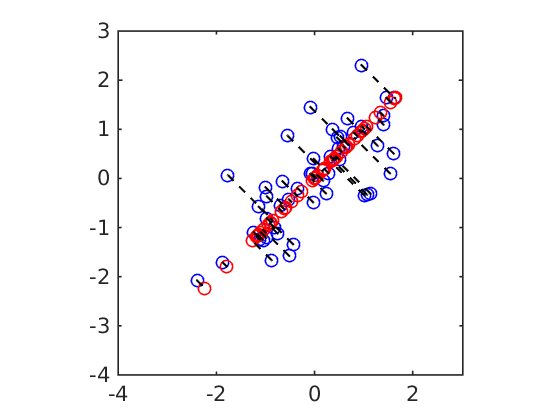

Projection of the first example: 1.481274
Approximation of the first example: -1.047419 -1.047419

In [3]:
%  Plot the normalized dataset (returned from pca)
plot(X_norm(:, 1), X_norm(:, 2), 'bo');
axis([-4 3 -4 3]); axis square

%  Project the data onto K = 1 dimension
K = 1;
Z=X_norm*U(:,1:K);
fprintf('Projection of the first example: %f\n', Z(1));

% Reconstruction using K-largest leading components
X_rec = Z*U(:,1:K)';
fprintf('Approximation of the first example: %f %f\n', X_rec(1, 1), X_rec(1, 2));

%  Draw lines connecting the projected points to the original points
hold on;
plot(X_rec(:, 1), X_rec(:, 2), 'ro');
for i = 1:size(X_norm, 1)
    funcs_09_KmeanPCA_drawLine(X_norm(i,:), X_rec(i,:), '--k', 'LineWidth', 1);
end
hold off

## Part 2: PCA on Face Data <a id='part2'></a>

We will run PCA on face images to see how it can be used in practice for dimension reduction. The dataset "data_09_KmeanPCA_faces.mat" contains a dataset X of face images, each 32 × 32 in grayscale. Each row of X corresponds to one face image (a row vector of length 1024). After performing PCA, we displays the first 36 principal components that describe the largest variations

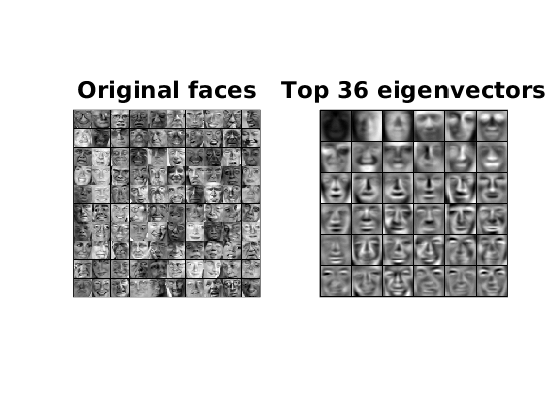

In [4]:
%  Load Face dataset
load ('data_09_PCA_faces.mat')

%  Before running PCA, it is important to first normalize X by subtracting 
%  the mean value from each feature
mu = mean(X);
X_norm = bsxfun(@minus, X, mu);
sigma = std(X_norm);
X_norm = bsxfun(@rdivide, X_norm, sigma);

%  Run PCA
Sigma=1/size(X_norm,1)*(X_norm')*X_norm;
[U, S, V] = svd(Sigma);


%  Visualize the data
subplot(1, 2, 1);
funcs_09_KmeanPCA_displayData(X_norm(1:100,:));
title('Original faces');
axis square;

%  Visualize the top 36 eigenvectors found
subplot(1, 2, 2);
funcs_09_KmeanPCA_displayData(U(:, 1:36)');
title('Top 36 eigenvectors');
axis square;

## Part 4: Dimension Reduction for Faces <a id='part4'></a>

Now that you have computed the principal components for the face dataset, you can use it to reduce the dimension of the face dataset. This allows you to use your learning algorithm with a smaller input size (e.g., 100 dimensions)
instead of the original 1024 dimensions. This can help speed up your learning algorithm.

To understand what is lost in the dimension reduction,we will recover the data using only the projected dataset. An approximate recovery of the data is performed and the original and projected face images are displayed as follows.

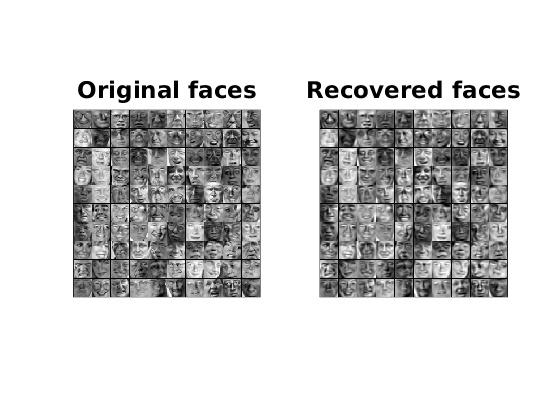

The projected data Z has a size of: 5000 100

In [5]:
K = 100;
Z=X_norm*U(:,1:K);

fprintf('The projected data Z has a size of: ')
fprintf('%d ', size(Z));

% Project images to the eigen space using the top K eigen vectors and visualize only using those K dimensions
% Compare to the original input, which is also displayed

X_rec = Z*U(:,1:K)';

% Display normalized data
subplot(1, 2, 1);
funcs_09_KmeanPCA_displayData(X_norm(1:100,:));
title('Original faces');
axis square;

% Display reconstructed data from only k eigenfaces
subplot(1, 2, 2);
funcs_09_KmeanPCA_displayData(X_rec(1:100,:));
title('Recovered faces');
axis square;

From the reconstruction, it is observed that the general structure and appearance of the face are kept while the fine details are lost. This is a remarkable reduction (more than 10 times) in the dataset size that can help speed up your learning algorithm significantly.